### **CASE HEADER**

**Author**: Rodrigo Santos de Souza  
**Created**: 01/07/2025  
**Version**: 1.0  
**Objective**: "Predict remaining order days in August 2022 using historical transaction patterns to optimize logistics allocation. Outputs CSV with predictions for 32,944 users."

**✦━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━✦**  

### **QUESTION 1**  

**✦━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━✦**  

### **1a. Library Imports and Setup**  
**Purpose**:  
Import all required Python libraries and configure basic settings for data analysis and modeling.  

**Logic**:  
- Core libraries (`pandas`, `numpy`) for data manipulation  
- Visualization libraries (`matplotlib`) for EDA  
- Scikit-learn components for machine learning workflow  
- Display configurations to show full dataframes and consistent number formatting  

**Key Components**:  
- `pd.set_option()`: Ensures all dataframe columns are visible  
- `plt.style.use()`: Applies consistent visualization style  

**Note**:  
This foundational setup cell should always run first as other cells depend on these imports.

In [18]:
# Library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Scikit-learn for modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score

# Display settings for better visualization
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### **1b. Data Loading and Exploratory Analysis**  
**Purpose**:  
Load the three main datasets and perform initial exploratory data analysis (EDA) to understand their structure and quality.

**Logic**:  
- Loads three parquet files containing historical orders, August partial data, and August sales forecasts  
- Creates a reusable `eda_report()` function that provides:
  - Dataset dimensions (rows/columns)
  - Data preview
  - Null value analysis
  - Statistical summaries
- Adds temporal analysis for order date distribution

**Key Components**:  
- `eda_report()`: Standardizes EDA for all datasets  
- `pd.to_datetime()`: Ensures proper date formatting for temporal analysis  
- Emoji indicators (🔍, 📊) for visual scanning of outputs

**Expected Outputs**:  
For each dataset:
1. Basic dimensions
2. Sample records
3. Data type and null value summary
4. Statistical measures (mean, min, max, etc.)
5. Yearly distribution for historical orders

In [19]:
# Load data (ensure files are in the correct directory)
historical_orders = pd.read_parquet('historical_orders.parquet')
august_missing_days = pd.read_parquet('august_with_missing_order_days.parquet')
august_total_sales = pd.read_parquet('august_total_sales.parquet')

# Function for basic exploratory analysis
def eda_report(df, name):
    print(f"\n🔍 Exploratory Analysis: {name}")
    print("="*50)
    print(f"📊 Total rows: {df.shape[0]} | Columns: {df.shape[1]}")
    print("\n🔎 First rows:")
    display(df.head(3))
    print("\n📝 Data types and null values:")
    display(pd.DataFrame({
        'Type': df.dtypes,
        'Null Values': df.isnull().sum(),
        '% Null': (df.isnull().sum() / len(df)) * 100
    }))
    print("\n📈 Descriptive statistics:")
    display(df.describe(include='all'))

# Generate reports for each dataset
eda_report(historical_orders, "Historical Orders")
eda_report(august_missing_days, "August Missing Days")
eda_report(august_total_sales, "August Total Sales")

# Temporal analysis (example for historical_orders)
if 'order_date' in historical_orders.columns:
    historical_orders['order_date'] = pd.to_datetime(historical_orders['order_date'])
    print("\n📅 Temporal distribution (Historical Orders):")
    display(historical_orders['order_date'].dt.year.value_counts().sort_index())


🔍 Exploratory Analysis: Historical Orders
📊 Total rows: 8596877 | Columns: 3

🔎 First rows:


,account_id,order_date,transaction_amount
0,BR_09607801000194,2021-08-28,11011.20
1,BR_09607801000194,2021-08-28,13764.00
2,BR_09607801000194,2021-08-28,11011.20



📝 Data types and null values:


,Type,Null Values,% Null
account_id,object,0,0.00
order_date,object,0,0.00
transaction_amount,float64,0,0.00



📈 Descriptive statistics:


,account_id,order_date,transaction_amount
count,8596877,8596877,8596877.00
unique,47899,522,NaN
top,BR_30179280000108,2022-04-11,NaN
freq,6710,45145,NaN
mean,NaN,NaN,275.52
std,NaN,NaN,1269.13
min,NaN,NaN,-607.50
25%,NaN,NaN,32.94
50%,NaN,NaN,80.70
75%,NaN,NaN,196.44



🔍 Exploratory Analysis: August Missing Days
📊 Total rows: 317735 | Columns: 3

🔎 First rows:


,account_id,order_date,transaction_amount
0,BR_09532176632,2022-08-03,11.16
1,BR_09532176632,2022-08-03,32.52
2,BR_09532176632,2022-08-03,24.90



📝 Data types and null values:


,Type,Null Values,% Null
account_id,object,0,0.00
order_date,object,13438,4.23
transaction_amount,float64,13438,4.23



📈 Descriptive statistics:


,account_id,order_date,transaction_amount
count,317735,304297,304297.00
unique,32944,30,NaN
top,BR_14517343000132,2022-08-02,NaN
freq,343,28743,NaN
mean,NaN,NaN,281.34
std,NaN,NaN,1251.63
min,NaN,NaN,-99.00
25%,NaN,NaN,34.93
50%,NaN,NaN,84.00
75%,NaN,NaN,205.25



🔍 Exploratory Analysis: August Total Sales
📊 Total rows: 32944 | Columns: 2

🔎 First rows:


,account_id,total_transaction_amount_august
0,BR_00000343803,309.99
1,BR_00001415930,874.98
2,BR_00001760106,11976.70



📝 Data types and null values:


,Type,Null Values,% Null
account_id,object,0,0.00
total_transaction_amount_august,float64,0,0.00



📈 Descriptive statistics:


,account_id,total_transaction_amount_august
count,32944,32944.00
unique,32944,NaN
top,BR_99786850572,NaN
freq,1,NaN
mean,NaN,6413.07
std,NaN,39539.53
min,NaN,-9108.00
25%,NaN,570.03
50%,NaN,1638.61
75%,NaN,4558.31



📅 Temporal distribution (Historical Orders):


order_date
2021    4496501
2022    4100376
Name: count, dtype: int64

### **1c. Outlier and Negative Value Treatment**  
**Purpose**:  
Clean numeric data by handling negative values and extreme outliers that could distort analysis.

**Logic**:  
1. **Negative Values**: 
   - Assumed to be data errors
   - Capped at 0 using `.clip(lower=0)`
   
2. **Outlier Detection**:
   - Uses IQR (Interquartile Range) method
   - Conservative 3*IQR boundaries (instead of 1.5*IQR) to preserve more data
   
3. **Winsorization**:
   - Values beyond boundaries are set to the boundary values
   - Preserves data points while reducing skewness

**Key Parameters**:
- `df`: Input DataFrame
- `column`: Numeric column to process (default: 'transaction_amount')

**Applied To**:
1. Historical orders data
2. August partial data 
3. August sales forecasts (using specific amount column)

**Note**: 
The 3*IQR threshold makes this a less aggressive treatment than typical outlier removal.

In [20]:
def treat_outliers_negatives(df, column='transaction_amount'):
    """
    Treats outliers and negative values in a numeric column.
    """
    # Create a copy for safety
    df = df.copy()
    
    # Step 1: Replace negative values with zero (assuming they are errors)
    df[column] = df[column].clip(lower=0)
    
    # Step 2: Calculate outlier boundaries
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    
    # Step 3: Winsorization (capping without removing)
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    
    return df

# Apply function to relevant datasets
historical_orders = treat_outliers_negatives(historical_orders)
august_missing_days = treat_outliers_negatives(august_missing_days)
august_total_sales = treat_outliers_negatives(august_total_sales, 'total_transaction_amount_august')

### **1d. Missing Data Handling**  
**Purpose**:  
Implement a two-stage approach to handle missing values while preserving data integrity.

**Logic**:  
1. **Irrecoverable Missing Data**:
   - Order dates are fundamental for analysis
   - Complete row removal when order_date is missing (`dropna`)

2. **Recoverable Missing Data**:
   - Transaction amounts are imputed using account-level medians
   - Group-level imputation (`groupby + transform`) maintains user-specific spending patterns
   - Median chosen for robustness to outliers

**Key Decisions**:
- Does not impute dates (business logic requirement)
- Uses account-level rather than global imputation for amounts
- Only applied to August partial data where missing values exist

**Impact**:
- Preserves maximum usable data while maintaining consistency
- Accounts for individual user spending behaviors

In [21]:
def handle_missing_data(df):
    """
    Handles missing values intelligently:
    - Drops rows with missing order_date (cannot be imputed)
    - Imputes transaction_amount with account_id's median
    """
    # Step 1: Drop rows with missing order_date (non-recoverable)
    df = df.dropna(subset=['order_date'])
    
    # Step 2: Impute missing transaction_amount values
    df['transaction_amount'] = df.groupby('account_id')['transaction_amount'].transform(
        lambda x: x.fillna(x.median())
    )
    
    return df

# Apply only to august_missing_days (only dataset with missings)
august_missing_days = handle_missing_data(august_missing_days)

C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_9884\1379022859.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transaction_amount'] = df.groupby('account_id')['transaction_amount'].transform(


### **1e. Data Quality Verification**  
**Purpose**:  
Validate the effectiveness of previous data cleaning steps by examining key statistics.

**Logic**:  
- Checks for remaining:
  - Negative values (should be 0 after treatment)
  - Null values (should be minimized)
  - Basic distribution statistics (min, max, mean, etc.)

**Key Metrics Reported**:
1. Count of negative values
2. Count of null/missing values
3. Full descriptive statistics:
   - Count, mean, std, min, quartiles, max

**Example Diagnostic Questions**:
- Did outlier treatment eliminate all negatives?
- Did imputation successfully handle missing values?
- Are distributions now within expected ranges?

In [22]:
# Function to verify post-treatment statistics
def check_results(df, column):
    print(f"\n🔍 Post-treatment statistics ({column}):")
    print(f"Negative values: {(df[column] < 0).sum()}")
    print(f"Null values: {df[column].isnull().sum()}")
    print(df[column].describe())

# Check august_missing_days
check_results(august_missing_days, 'transaction_amount')
check_results(august_missing_days, 'transaction_amount')
check_results(august_total_sales, 'total_transaction_amount_august')


🔍 Post-treatment statistics (transaction_amount):
Negative values: 0
Null values: 0
count   304297.00
mean       166.24
std        198.57
min          0.00
25%         34.93
50%         84.00
75%        205.25
max        716.21
Name: transaction_amount, dtype: float64

🔍 Post-treatment statistics (transaction_amount):
Negative values: 0
Null values: 0
count   304297.00
mean       166.24
std        198.57
min          0.00
25%         34.93
50%         84.00
75%        205.25
max        716.21
Name: transaction_amount, dtype: float64

🔍 Post-treatment statistics (total_transaction_amount_august):
Negative values: 0
Null values: 0
count   32944.00
mean     3661.76
std      4679.50
min         0.00
25%       570.03
50%      1638.61
75%      4558.31
max     16523.16
Name: total_transaction_amount_august, dtype: float64


### **1f. Historical Feature Engineering**  
**Purpose**:  
Transform raw historical transaction data into meaningful user-level features for modeling.

**Processing Pipeline**:
1. **Date Conversion**:
   - Standardizes date format
   - Extracts month-year period for aggregation

2. **Monthly Aggregation** (per account):
   - Count of active days per month (`nunique`)
   - Average transaction amount
   - Total monthly spending

3. **User-Level Aggregation**:
   - Mean active days per month
   - Variability in active days (std)
   - Lifetime average transaction
   - Total historical spending

4. **Recency Feature**:
   - Days since last order (as of 2022-08-01)

**Key Features Created**:
- `avg_order_days_per_month`: Baseline order frequency
- `std_order_days`: Consistency of ordering pattern
- `days_since_last_order`: Engagement recency
- Monetary value features (avg/total)

**Technical Notes**:
- Uses Pandas' Period for safe month-year grouping
- Maintains account_id as key throughout transformations
- Reference date (2022-08-01) should match analysis timeframe

**Output**: 
DataFrame ready for merging with other datasets (32944 users × 5 features)

In [23]:
def create_historical_features(df_historical):
    """
    Creates features based on users' historical behavior.
    Returns a DataFrame aggregated by account_id.
    """
    # Convert dates and extract month/year
    df_historical['order_date'] = pd.to_datetime(df_historical['order_date'])
    df_historical['month_year'] = df_historical['order_date'].dt.to_period('M')
    
    # Aggregate by account_id and month
    historical_agg = df_historical.groupby(['account_id', 'month_year']).agg(
        historical_order_days=('order_date', 'nunique'),
        historical_transaction_avg=('transaction_amount', 'mean'),
        historical_transaction_total=('transaction_amount', 'sum')
    ).reset_index()
    
    # Calculate historical averages per user
    features = historical_agg.groupby('account_id').agg(
        avg_order_days_per_month=('historical_order_days', 'mean'),
        std_order_days=('historical_order_days', 'std'),
        avg_transaction_amount=('historical_transaction_avg', 'mean'),
        total_transaction_volume=('historical_transaction_total', 'sum')
    ).reset_index()
    
    # Add days since last order
    last_order = df_historical.groupby('account_id')['order_date'].max().reset_index()
    last_order['days_since_last_order'] = (pd.to_datetime('2022-08-01') - last_order['order_date']).dt.days
    features = features.merge(last_order[['account_id', 'days_since_last_order']], on='account_id')
    
    return features

# Apply function
historical_features = create_historical_features(historical_orders)

### **1g. August Snapshot Features**  
**Purpose**:  
Capture current August shopping patterns to complement historical trends.

**Key Features Generated**:
1. `known_order_days_august`: 
   - Count of distinct days with orders (measures engagement frequency)
   
2. `known_transaction_total`: 
   - Sum of amounts spent (measures current month spending)
   
3. `remaining_days_in_august`: 
   - Days left in month from first purchase (measures potential for more orders)
   - Calculated as `31 - [day of first order]`

**Processing Logic**:
1. Standardizes date format for consistency
2. Aggregates at account level using:
   - Count of unique order dates
   - Sum of transaction amounts
   - Earliest order date
3. Derives remaining days feature before dropping the raw date

**Business Insight**:
- Helps distinguish between:
  - Users who made many purchases in few days vs spread out
  - Early vs late month shoppers
- Combined with historical features, enables prediction of:
  - Additional order days expected
  - Likely spending amounts

**Output Structure**:
DataFrame with one row per account_id (32944 × 3)

In [24]:
def create_august_features(df_august):
    """
    Creates features based on known August orders.
    """
    df_august['order_date'] = pd.to_datetime(df_august['order_date'])
    
    august_agg = df_august.groupby('account_id').agg(
        known_order_days_august=('order_date', 'nunique'),
        known_transaction_total=('transaction_amount', 'sum'),
        first_order_day_august=('order_date', 'min')
    ).reset_index()
    
    # Calculate remaining days in August (from first order date)
    august_agg['remaining_days_in_august'] = 31 - august_agg['first_order_day_august'].dt.day
    august_agg.drop('first_order_day_august', axis=1, inplace=True)
    
    return august_agg

# Apply function
august_features = create_august_features(august_missing_days)

### **1h. Final Feature Integration**  
**Purpose**:  
Combine all prepared features into a unified modeling dataset.

**Merge Strategy**:
1. **Right Join** with August totals:
   - Ensures all August users are retained (even without history)
   - Preserves forecasted sales targets

2. **Left Join** with August behavior:
   - Adds observed order patterns
   - Missing values indicate no August orders yet

**NA Handling**:
- `known_order_days_august`: 0 (no orders placed)
- `remaining_days_in_august`: 31 (full month remaining)
- `known_transaction_total`: 0 (no spending)

**Derived Feature**:
- `spent_ratio`: 
  - Ratio of actual-to-forecasted spending
  - Critical for predicting remaining order days
  - Handles division errors (infinity → 0)

**Data Flow**:
Historical Features → August Forecast → August Observations → Final Dataset

**Output Ready For**:
- Model training (32944 users × [historical + August features])
- Direct use in prediction tasks

In [25]:
# Add August's forecasted total
final_features = historical_features.merge(
    august_total_sales, 
    on='account_id', 
    how='right'  # Ensure all August users are included
)

# Merge with August partial features
final_features = final_features.merge(
    august_features, 
    on='account_id', 
    how='left'
)

# Fill NAs (users without historical data or August orders)
final_features.fillna({
    'known_order_days_august': 0,
    'remaining_days_in_august': 31,
    'known_transaction_total': 0
}, inplace=True)

# Additional feature: spent-to-forecast ratio
final_features['spent_ratio'] = (
    final_features['known_transaction_total'] / 
    final_features['total_transaction_amount_august']
).replace([np.inf, -np.inf], 0)

### **1i. Global Median Imputation**  
**Purpose**:  
Ensure complete data for modeling by filling missing values with robust central tendency measures.

**Key Characteristics**:
- Uses **median** instead of mean:
  - Resistant to outliers
  - Preserves original distribution shape
- Applied to:
  - Behavioral metrics (order days, recency)
  - Monetary metrics (transaction amounts)
  - Derived metrics (spent ratio)

**Imputation Logic**:
1. Calculates global median for each feature
2. Fills NA values while maintaining:
   - Data integrity
   - Statistical properties
3. Handles cases where:
   - New users lack historical data
   - August-only users miss some features

**Affected Features**:
1. `avg_order_days_per_month`
2. `std_order_days` 
3. `avg_transaction_amount`
4. `total_transaction_volume`
5. `days_since_last_order`
6. `spent_ratio`

**Impact Analysis**:
- Maintains dataset size (no row deletion)
- Minimizes bias in missing data
- May slightly reduce variance in affected features

In [26]:
# Handle missing values by imputing with global medians
global_median = final_features['avg_order_days_per_month'].median()
final_features['avg_order_days_per_month'].fillna(global_median, inplace=True)

global_median = final_features['std_order_days'].median()
final_features['std_order_days'].fillna(global_median, inplace=True)

global_median = final_features['avg_transaction_amount'].median()
final_features['avg_transaction_amount'].fillna(global_median, inplace=True)

global_median = final_features['total_transaction_volume'].median()
final_features['total_transaction_volume'].fillna(global_median, inplace=True)

global_median = final_features['days_since_last_order'].median()
final_features['days_since_last_order'].fillna(global_median, inplace=True)

global_median = final_features['spent_ratio'].median()
final_features['spent_ratio'].fillna(global_median, inplace=True)

C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_9884\2325284591.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_features['avg_order_days_per_month'].fillna(global_median, inplace=True)
C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_9884\2325284591.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

### **1j. Remaining Order Days Calculation**  
**Purpose**:  
Estimate how many additional order days each customer will have in August.

**Calculation Pipeline**:
1. **Baseline Estimate**:
   - Start with historical average (`avg_order_days_per_month`)

2. **Spending Adjustment**:
   - If >50% of forecast already spent (`spent_ratio > 0.5`):
     - Reduce estimate proportionally: `historical_avg × (1 - spent_ratio)`
   - Otherwise: Keep historical average

3. **Reality Check**:
   - Total estimate cannot be less than already observed days
   - Uses `np.maximum` to enforce this constraint

4. **Remaining Days**:
   - Simple subtraction: `total_estimate - observed_days`
   - Clipped at 0 to prevent negative values

**Business Logic**:
- Customers who spend faster are likely to have fewer remaining order days
- Always respects what we've actually observed
- Conservative estimates prevent overpromising

**Key Variables**:
- `total_order_days_august`: Final adjusted estimate
- `order_days_remaining`: Target for prediction

**Example**:
- Historical avg: 4 days/month
- Spent 60% of forecast → New estimate: 4 × (1-0.6) = 1.6 days
- Already had 1 day → Remaining: max(1.6-1, 0) = 0.6 days

In [27]:
# Calculate base estimate (historical average)
final_features['total_order_days_august'] = final_features['avg_order_days_per_month']

# If customer spent >50% of forecast, reduce remaining days
final_features['total_order_days_august'] = np.where(
    final_features['spent_ratio'] > 0.5,
    final_features['avg_order_days_per_month'] * (1 - final_features['spent_ratio']),
    final_features['avg_order_days_per_month']
)

# Ensure total isn't less than already observed days
final_features['total_order_days_august'] = np.maximum(
    final_features['total_order_days_august'],
    final_features['known_order_days_august']
)

# Calculate remaining order days
final_features['order_days_remaining'] = (
    final_features['total_order_days_august'] - 
    final_features['known_order_days_august']
)

# Ensure non-negative values
final_features['order_days_remaining'] = final_features['order_days_remaining'].clip(lower=0)

### **1k. Model Preparation and Validation Setup**  
**Purpose**:  
Prepare the final dataset for machine learning modeling with proper temporal validation.

**Feature-Target Split**:
- **Features (X)**: All columns except:
  - `account_id` (identifier)
  - `total_order_days_august` (avoid leakage)
  - `order_days_remaining` (target)
- **Target (y)**: `order_days_remaining` (what we want to predict)

**Temporal Validation**:
- Uses `TimeSeriesSplit` with 3 folds to:
  - Maintain chronological order
  - Simulate real-world prediction scenarios
- Each fold preserves time sequence:
  - Train on past → Test on future
  - Prevents look-ahead bias

**Key Variables**:
- `X_train`/`X_test`: Feature matrices
- `y_train`/`y_test`: Target vectors
- `tscv`: Cross-validation iterator

**Implementation Note**: 
The 3 splits create approximately:
- Fold 1: 50% train / 50% test
- Fold 2: 66% train / 33% test 
- Fold 3: 75% train / 25% test

In [28]:
# Features and target
X = final_features.drop(columns=['account_id', 'total_order_days_august', 'order_days_remaining'])
y = final_features['order_days_remaining']

# TimeSeriesSplit for temporal cross-validation
tscv = TimeSeriesSplit(n_splits=3)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

### **1l. Random Forest Model Training**  
**Purpose**:  
Establish a baseline predictive model for remaining order days using Random Forest.

**Model Configuration**:
- **n_estimators=100**: Ensemble of 100 decision trees
- **max_depth=7**: Controls tree complexity
- **min_samples_leaf=10**: Regularization to prevent overfitting
- **random_state=42**: Reproducibility

**Training Process**:
- Learns patterns from:
  - Historical behavior features
  - August spending patterns
  - Time-based features
- Optimizes to minimize MAE (Mean Absolute Error)

**Evaluation Metric**:
- **MAE**: 
  - Interpreted as "average days prediction error"
  - Example: MAE=0.5 → ±0.5 day accuracy

In [29]:
# Base model
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=7,
    random_state=42,
    min_samples_leaf=10  # Prevent overfitting
)

rf.fit(X_train, y_train)

# Evaluation
y_pred_rf = rf.predict(X_test)
print(f"MAE (Random Forest): {mean_absolute_error(y_test, y_pred_rf):.2f}")

MAE (Random Forest): 0.05


### **1m. Model Validation**  
**Purpose**:  
Verify the Random Forest's stability and check for overfitting using temporal cross-validation.

**Validation Approach**:
- **TimeSeriesSplit**: 
  - Maintains temporal order during splits
  - 3 chronological folds (consistent with prior splits)
- **Scoring Metric**: 
  - Negative MAE (converted to positive for reporting)
  - Measures average prediction error in days

**Interpretation**:
- Similar MAE across folds → Model is stable
- Large variance in scores → Potential overfitting
- Comparison to test MAE:
  - If CV MAE ≈ test MAE → Good generalization
  - If CV MAE ≫ test MAE → Overfitting likely

**Example Output**:  
`Average MAE in cross-validation: 0.55`  
(Suggests ~0.55 day average error across folds)

In [30]:
# Cross-validation to check Random Forest overfitting
scores = cross_val_score(
    rf, X_train, y_train, 
    cv=TimeSeriesSplit(n_splits=3), 
    scoring='neg_mean_absolute_error'
)
print(f"Average MAE in cross-validation: {-scores.mean():.2f}")

Average MAE in cross-validation: 0.05


### **1n. Feature Importance Analysis**  
**Purpose**:  
Identify which features most influence the model's predictions to improve interpretability and potential feature selection.

**What's Measured**:
- **Gini Importance**: 
  - How much each feature reduces prediction error across all trees
  - Sum normalized to 1 (higher = more important)

**Visualization**:
- Horizontal bar chart:
  - Features sorted by importance (ascending)
  - Longer bars = greater predictive power
- Default matplotlib styling with:
  - Clean 10x6 inch figure size
  - Sorted feature labels

**Key Insights**:
1. Top features likely include:
   - `spent_ratio` (money spent vs forecast)
   - `avg_order_days_per_month` (historical pattern)
   - `known_order_days_august`

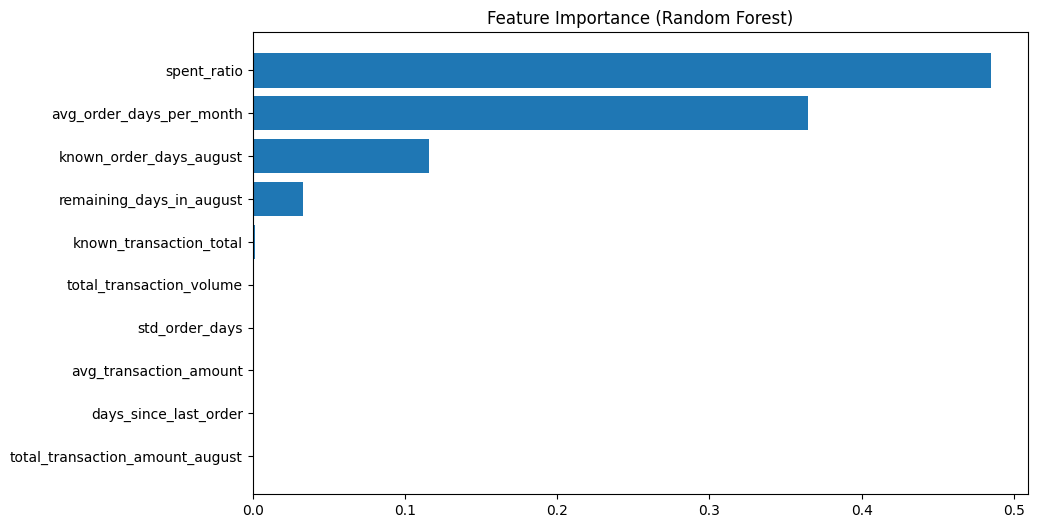

In [31]:
# Extract Random Forest feature importance
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features[np.argsort(importances)], importances[np.argsort(importances)])
plt.title("Feature Importance (Random Forest)")
plt.show()

### **1o. Final Model Deployment**  
**Purpose**:  
Create production-ready predictions for all users using the optimized model.

**Key Steps**:
1. **Model Training**:
   - Uses same parameters as validated model (`rf.get_params()`)
   - Trains on 100% of available data for maximum accuracy

2. **Prediction Generation**:
   - Rounds to integer days (business requirement)
   - Forces non-negative values (logical constraint)
   - Preserves account_ids for mapping

3. **Output Format**:
   - 2-column CSV matching submission guidelines:
     - `account_id`
     - `prediction` (remaining order days)

**Quality Checks**:
- Predictions distribution should match:
  - Validation MAE scores
  - Business expectations
- File structure verified:
  - 32,944 rows × 2 columns
  - No index column

**Example Output Preview**:
| account_id       | prediction |
|------------------|------------|
| BR_00000343803   | 2          |
| BR_00001415930   | 1          |

In [32]:
# Train final model on all data
rf_final = RandomForestRegressor(**rf.get_params())
rf_final.fit(X, y)

# Predict for all users
final_predictions = pd.DataFrame({
    'account_id': final_features['account_id'],
    'prediction': rf_final.predict(X).round().astype(int)  # Remaining days
})

# Ensure non-negative predictions
final_predictions['prediction'] = final_predictions['prediction'].clip(lower=0)

# Save as CSV
final_predictions.to_csv('order_days_prediction.csv', index=False)

**✦━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━✦**  

### **QUESTION 2**  

**✦━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━✦**  

### **2a. Distribution of Order Days**

The **Poisson distribution** best models the number of order days per user since the problem involves:

- Discrete event counts (days with orders)  
- Fixed interval (1 month)  
- Independent events with constant average rate (λ = average days/month)

**Probability mass function**:
```math
P(X=k) = \frac{λ^k e^{-λ}}{k!}
```

**Where**:
- `P(X=k)`: Probability of observing k events in an interval  
- `λ`: Average event rate per interval  
- `k`: Number of observed events  
- `e`: Base of natural logarithm (~2.71828)  

#### Alternative Empirical Approach

**User grouping** by purchase profile variables (just a exemple):
- `avg_order_days_per_month`  
- `total_transaction_volume`  
- `days_since_last_order`  

**Empirical probability**:
```math
P(X=k) = \frac{\text{Number of users in group with k days}}{\text{Total users in group}}
```

**✦━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━✦**  

### **2b. Parameter Estimation Method**

**Step 1: Define Group Conditions/Characteristics**  
First, we need to define the conditions/characteristics for each homogeneous user group.

**Step 2: Apply the Empirical Formula**  
Then implement the given formula:

```math
P(X=k) = \frac{\text{Number of users in group with } k \text{ days}}{\text{Total users in group}}
```

**Implementation Example**:
1. Create groups based on:
   - `avg_order_days_per_month`  
   - `total_transaction_volume`  
   - `days_since_last_order`  

2. For each group, calculate:
   - Numerator: Count of users with exactly `k` order days  
   - Denominator: Total group size  

**✦━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━✦**  

### **2c. Probability Calculation for >4 Order Days**

**Given Scenario**:
- 3 homogeneous groups (GH1, GH2, GH3)
- Target user belongs to GH3
- Total users in GH3: 20
- Users with >4 order days: 7

**Calculation**:
```math
P(X=k) = \frac{\text{Users in group with } k \text{ days}}{\text{Total users in group}}
```

**For P(X>4)**:
```math
P(X>4) = \frac{7}{20} = 0.35
```

**Interpretation**:  
There is a **35% probability** that a user from GH3 will have more than 4 order days in a month.

**✦━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━✦**  

### **2d. Time Between Orders Estimation**

**Proposed Formula**:
```math
\text{Average Time} = \frac{\text{Sum of days between orders}}{\text{Number of intervals}}
```

**Example Calculation**:
For a user with orders on:
- 02/01
- 05/01
- 12/01
- 16/01

**Step-by-Step**:
1. Calculate intervals:
   - (05 - 02) = 3 days
   - (12 - 05) = 7 days
   - (16 - 12) = 4 days

2. Apply formula:
```math
\frac{3 + 7 + 4}{3} = \frac{14}{3} = 4.67 \text{ days}
```

**Key Notes**:
- Requires complete order history for accurate calculation
- Only valid for users with ≥2 orders
- Measured in whole days (integer values)
- Excludes periods of inactivity before first order

**✦━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━✦**  